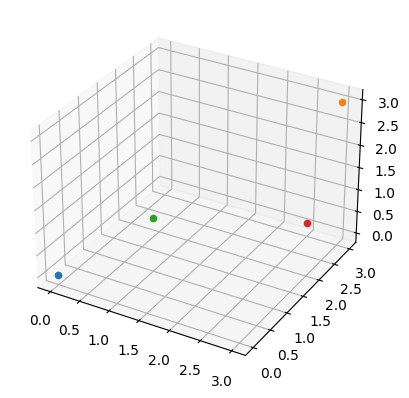

For 1 and 1 points:
0.0
0.0
0.0
0.0


For 1 and 2 points:
5.196152422706632
27.0
3.0
9.0


For 1 and 3 points:
1.7320508075688772
2.9999999999999996
1.0
3.0


For 1 and 4 points:
3.7416573867739413
14.0
3.0
6.0


For 2 and 2 points:
0.0
0.0
0.0
0.0


For 2 and 3 points:
3.4641016151377544
11.999999999999998
2.0
6.0


For 2 and 4 points:
2.23606797749979
5.000000000000001
2.0
3.0


For 3 and 3 points:
0.0
0.0
0.0
0.0


For 3 and 4 points:
2.23606797749979
5.000000000000001
2.0
3.0


For 4 and 4 points:
0.0
0.0
0.0
0.0




In [21]:
# 1.3.1

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

points = np.array([
    [0, 0, 0],
    [3, 3, 3],
    [1, 1, 1],
    [3, 2, 1]
])

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

for i in points:
    ax.scatter(i[0], i[1], i[2])

plt.show()

for i in range(len(points)):
    for j in range(i, len(points)):
        print(
            f"For {i+1} and {j+1} points:",
            np.linalg.norm(points[i] - points[j]),
            np.linalg.norm(points[i] - points[j]) ** 2,
            np.linalg.norm(points[i] - points[j], ord=np.inf),
            np.linalg.norm(points[i] - points[j], ord=1), "\n",
            sep='\n'
        )

In [24]:
# 1.3.2

import numpy as np

arr = np.zeros((5,5))
arr += np.arange(5)

print(arr)

[[0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]]


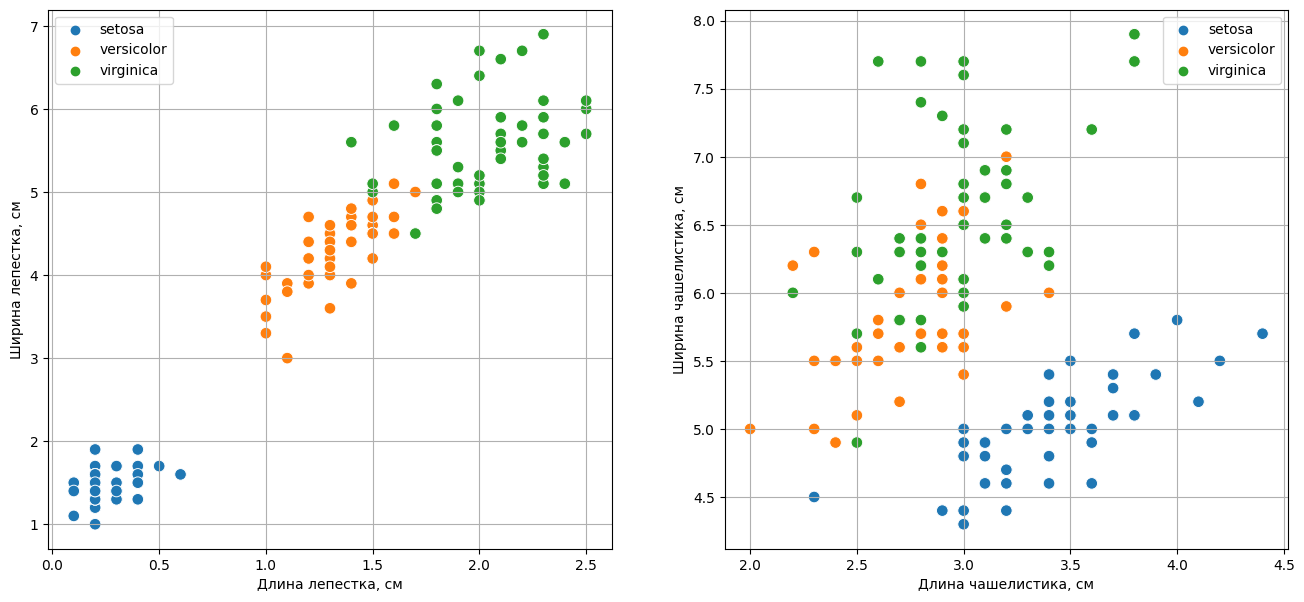

In [4]:
# 2.3.1

import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

iris = sns.load_dataset('iris')

plt.figure(figsize=(16, 7))

plt.subplot(121)
sns.scatterplot(
    data=iris,
    x='petal_width',
    y='petal_length',
    hue='species',
    s=70
)
plt.xlabel('Длина лепестка, см')
plt.ylabel('Ширина лепестка, см')
plt.legend()
plt.grid()

plt.subplot(122)
sns.scatterplot(
    data=iris,
    x='sepal_width',
    y='sepal_length',
    hue='species',
    s=70
)
plt.xlabel('Длина чашелистика, см')
plt.ylabel('Ширина чашелистика, см')
plt.legend()
plt.grid()

accuracy: 0.957
accuracy: 0.957
accuracy: 0.913


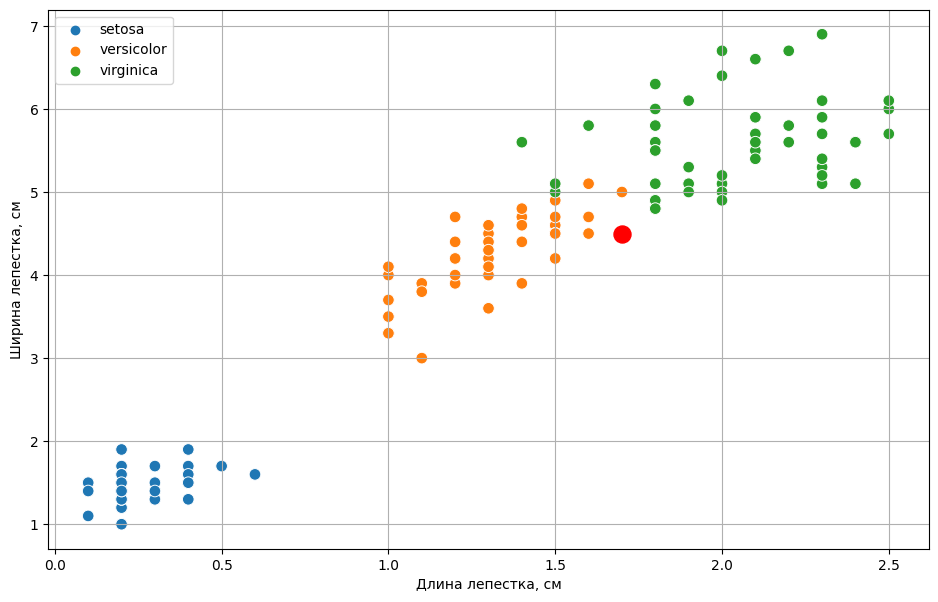

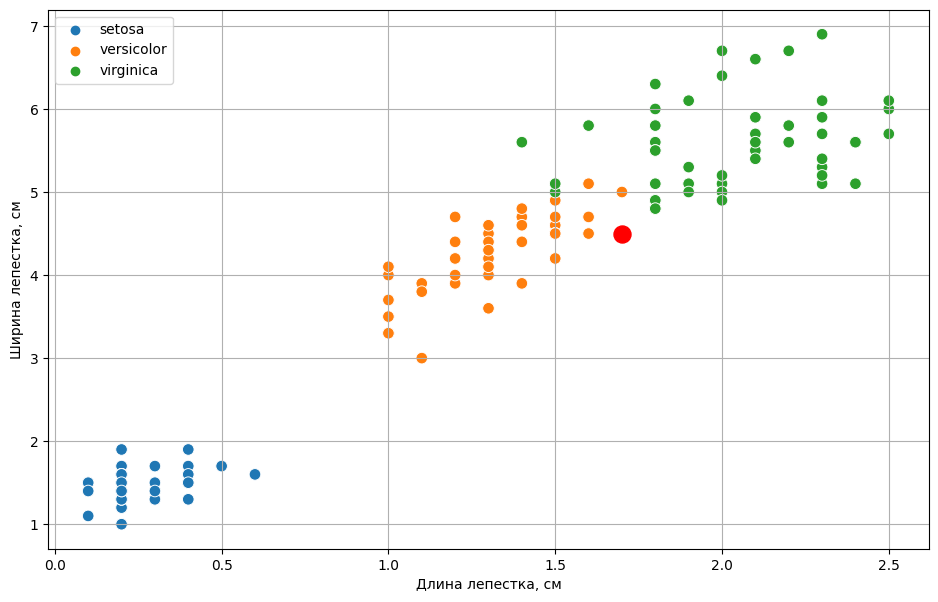

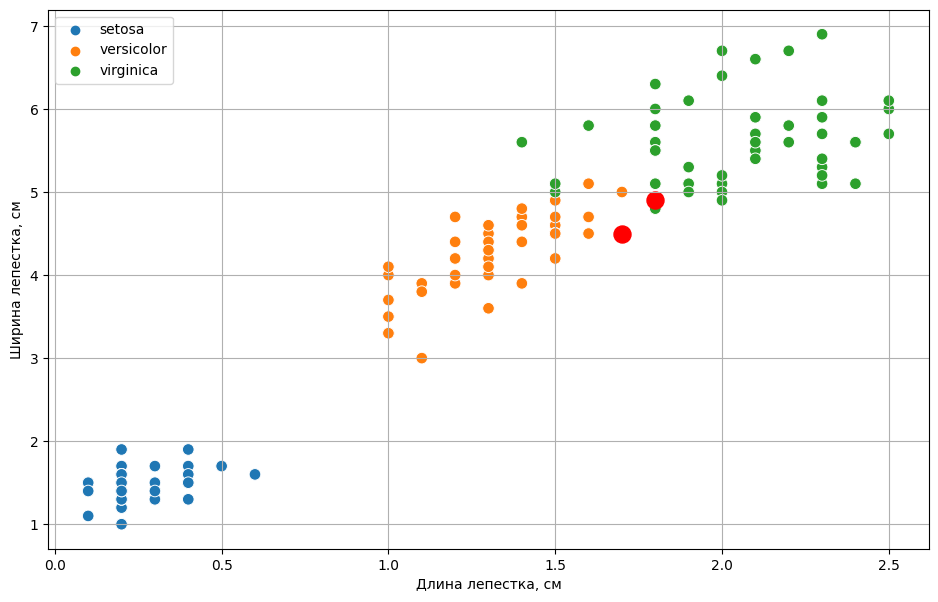

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    iris.iloc[:, :-1],
    iris.iloc[:, -1],
    test_size = 0.15
)

tmp = [1, 5, 10]

for each in tmp:
    model = KNeighborsClassifier(n_neighbors=each)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    plt.figure(figsize=(25, 7))

    plt.subplot(121)
    sns.scatterplot(
        data=iris,
        x='petal_width',
        y='petal_length',
        hue='species',
        s=70
    )
    plt.xlabel('Длина лепестка, см')
    plt.ylabel('Ширина лепестка, см')
    plt.legend()
    plt.grid()

    for i in range(len(y_test)):
        if np.array(y_test)[i] != y_pred[i]:
            plt.scatter(X_test.iloc[i, 3], X_test.iloc[i, 2], color='red', s=150)


    print(f"accuracy: {accuracy_score(y_test, y_pred) :.3}")

In [72]:
from sklearn.feature_extraction import DictVectorizer

data_dict = [
    {"eye color": 2, "weight": 3, "gender": 2, "age": 1},
    {"eye color": 3, "weight": 3, "gender": 3, "age": 1},
    {"eye color": 4, "weight": 4, "gender": 3, "age": 2},
    {"eye color": 3, "weight": 6, "gender": 4, "age": 4},
    {"eye color": 4, "weight": 1, "gender": 1, "age": 1},
    {"eye color": 2, "weight": 1, "gender": 2, "age": 3}
]

dictvectorizer = DictVectorizer(sparse=False)
features = dictvectorizer.fit_transform(data_dict)
print(features)

[[1. 2. 2. 3.]
 [1. 3. 3. 3.]
 [2. 4. 3. 4.]
 [4. 3. 4. 6.]
 [1. 4. 1. 1.]
 [3. 2. 2. 1.]]
